# YOLO V5

En aquesta pràctica aprendrem com podem emprar un dels models de l'estat de l'art (SOTA) en els nostres problemes d'Aprenentatge Automàtic. A diferència dels exercicis que hem realitzat durant aquest curs, la idea és aprendre a emprar arquitectures molt potents i avançades els quals s'empren en entorns industrials.

### YOLO: Una breu història

- **YOLO (You Only Look Once)**, un model popular de detecció d'objectes i segmentació d'imatges, va ser desenvolupat per Joseph Redmon i Ali Farhadi a la Universitat de Washington. Llançat el 2015, YOLO va guanyar ràpidament popularitat per la seva alta velocitat i precisió.
- **YOLOv2**, llançat el 2016, va millorar el model original incorporant _batch normalization_ i  _anchor boxes_.
- **YOLOv3**, llançat el 2018, va millorar encara més el rendiment del model mitjançant un _backbone_ més eficient, múltiples  _anchor boxes_ i agrupació de piràmides espacials (objectes de múltiples mides).
- **YOLOv4** es va llançar el 2020, introduint innovacions com l'augment de dades emprant mosaics, un nou capçal (_head_) de detecció i una nova funció de pèrdua.
- **YOLOv5** va millorar encara més el rendiment del model i va afegir noves funcions com ara l'optimització d'hiperparàmetres, el seguiment d'experiments integrat i l'exportació automàtica a formats d'exportació populars. [**Controvèrsia!!**](https://blog.roboflow.com/yolov4-versus-yolov5/)
- **YOLOv6** va ser de codi obert per [Meituan](https://github.com/meituan/YOLOv6) el 2022 i s'utilitza en molts dels robots de lliurament autònoms de la companyia.
- **YOLOv7** va afegir tasques addicionals, com ara l'estimació de poses (_pose estimation_) al conjunt de dades de punts clau COCO.
- **YOLOv8** és l'última versió de YOLO d'Ultralytics. Com a model d'avantguarda i d'última generació (SOTA), YOLOv8 es basa en l'èxit de les versions anteriors, introduint noves funcions i millores per millorar el rendiment, la flexibilitat i l'eficiència. YOLOv8 admet una gamma completa de tasques d'IA de visió, com ara detecció, segmentació, estimació de poses, seguiment i classificació. Aquesta versatilitat permet als usuaris aprofitar les capacitats de YOLOv8 en diferents aplicacions i dominis. --> Propaganda Ultralytics ^^

Nosaltres en aquesta pràctica usarem la versió 5, a que té un bon equilibri entre dificultat (complicacions d'ús) i els resultats que podem obtenir.

És **molt interessant** observar l'arquitectura d'aquesta xarxa i també els mètodes de augment de dades que han emprat: [enllaç](https://docs.ultralytics.com/yolov5/tutorials/architecture_description/)

## Ús de la xarxa

Podem emprar aquesta xarxa de 2 maneres:

- Directament del repositori d'Ultralytics:  https://github.com/ultralytics/yolov5.git
- Baixant el repositori i carregant la xarxa en local.

Normalment si només volem realitzar algunes proves, és suficient amb carregar la xarxa sense haver de descarregar tot el repositori, però si volem fer-hi feina és recomanable descarregar-ho, com ja sabeu, és pot fer amb la següent comanda:


In [ ]:
#!git clone https://github.com/ultralytics/yolov5.git

L'empresa Ultralytics proporciona un entorn de software que facilita l'ús de la xarxa, per tant es recomanable realitzar l'instalació del seu propi paquet Python:

In [5]:
!pip install --upgrade scipy

Defaulting to user installation because normal site-packages is not writeable


Com Yolo no està inclos a la llibreria, emprarem Pytorch _Hub_ que permet carregar models pre-entrenats, aquesta part de la llibreria està dissenyada per facilitar la reproductibilitat de la investigació. Conté alguns models i també aporta funcions per la seva carrega. [Documentació](https://pytorch.org/docs/stable/hub.html)

YoloV5 presenta 5 versions diferents, cada una d'aquestes versions té una xarxa _backbone_ de mida diferent, a més tenim 2 mides d'entrada d'imatges:

<table>
  <thead>
    <tr>
      <th>Model</th>
      <th>size<br><sup>(pixels)</sup></th>
      <th>mAP<sup>val<br>50-95</sup></th>
      <th>mAP<sup>val<br>50</sup></th>
      <th>Speed<br><sup>CPU b1<br>(ms)</sup></th>
      <th>Speed<br><sup>V100 b1<br>(ms)</sup></th>
      <th>Speed<br><sup>V100 b32<br>(ms)</sup></th>
      <th>params<br><sup>(M)</sup></th>
      <th>FLOPs<br><sup>@640 (B)</sup></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><a href="https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5n.pt" target="_blank">YOLOv5n</a></td>
      <td>640</td>
      <td>28.0</td>
      <td>45.7</td>
      <td><strong>45</strong></td>
      <td><strong>6.3</strong></td>
      <td><strong>0.6</strong></td>
      <td><strong>1.9</strong></td>
      <td><strong>4.5</strong></td>
    </tr>
    <tr>
      <td><a href="https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5s.pt" target="_blank">YOLOv5s</a></td>
      <td>640</td>
      <td>37.4</td>
      <td>56.8</td>
      <td>98</td>
      <td>6.4</td>
      <td>0.9</td>
      <td>7.2</td>
      <td>16.5</td>
    </tr>
    <tr>
      <td><a href="https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5m.pt" target="_blank">YOLOv5m</a></td>
      <td>640</td>
      <td>45.4</td>
      <td>64.1</td>
      <td>224</td>
      <td>8.2</td>
      <td>1.7</td>
      <td>21.2</td>
      <td>49.0</td>
    </tr>
    <tr>
      <td><a href="https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5l.pt" target="_blank">YOLOv5l</a></td>
      <td>640</td>
      <td>49.0</td>
      <td>67.3</td>
      <td>430</td>
      <td>10.1</td>
      <td>2.7</td>
      <td>46.5</td>
      <td>109.1</td>
    </tr>
    <tr>
      <td><a href="https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5x.pt" target="_blank">YOLOv5x</a></td>
      <td>640</td>
      <td>50.7</td>
      <td>68.9</td>
      <td>766</td>
      <td>12.1</td>
      <td>4.8</td>
      <td>86.7</td>
      <td>205.7</td>
    </tr>
    <tr>
      <td>&nbsp;</td>
      <td>&nbsp;</td>
      <td>&nbsp;</td>
      <td>&nbsp;</td>
      <td>&nbsp;</td>
      <td>&nbsp;</td>
      <td>&nbsp;</td>
      <td>&nbsp;</td>
      <td>&nbsp;</td>
    </tr>
    <tr>
      <td><a href="https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5n6.pt" target="_blank">YOLOv5n6</a></td>
      <td>1280</td>
      <td>36.0</td>
      <td>54.4</td>
      <td>153</td>
      <td>8.1</td>
      <td>2.1</td>
      <td>3.2</td>
      <td>4.6</td>
    </tr>
    <tr>
      <td><a href="https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5s6.pt" target="_blank">YOLOv5s6</a></td>
      <td>1280</td>
      <td>44.8</td>
      <td>63.7</td>
      <td>385</td>
      <td>8.2</td>
      <td>3.6</td>
      <td>12.6</td>
      <td>16.8</td>
    </tr>
    <tr>
      <td><a href="https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5m6.pt" target="_blank">YOLOv5m6</a></td>
      <td>1280</td>
      <td>51.3</td>
      <td>69.3</td>
      <td>887</td>
      <td>11.1</td>
      <td>6.8</td>
      <td>35.7</td>
      <td>50.0</td>
    </tr>
    <tr>
      <td><a href="https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5l6.pt" target="_blank">YOLOv5l6</a></td>
      <td>1280</td>
      <td>53.7</td>
      <td>71.3</td>
      <td>1784</td>
      <td>15.8</td>
      <td>10.5</td>
      <td>76.8</td>
      <td>111.4</td>
    </tr>
    <tr>
      <td><a href="https://github.com/ultralytics/yolov5/releases/download/v7.0/yolov5x6.pt" target="_blank">YOLOv5x6</a><br>+ [TTA]</td>
      <td>1280<br>1536</td>
      <td>55.0<br><strong>55.8</strong></td>
      <td>72.7<br><strong>72.7</strong></td>
      <td>3136<br>-</td>
      <td>26.2<br>-</td>
      <td>19.4<br>-</td>
      <td>140.7<br>-</td>
      <td>209.8<br>-</td>
    </tr>
  </tbody>
</table>

Explicació mètrica [mAP](https://jonathan-hui.medium.com/map-mean-average-precision-for-object-detection-45c121a31173)

Nosaltres començarem fent proves amb la versió més petita:

In [1]:
import torch

# Model
model = torch.hub.load('ultralytics/yolov5', 'yolov5n', pretrained=True)  # Carrega online
#model = torch.hub.load("yolov5/","yolov5n", source="local")  # Carrega local


Using cache found in C:\Users\Victor/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-12-16 Python-3.9.12 torch-2.1.1+cu121 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)

Fusing layers... 
YOLOv5n summary: 213 layers, 1867405 parameters, 0 gradients, 4.5 GFLOPs
Adding AutoShape... 


In [2]:
model;

### Inferència

YOLOv5 ha estat entrenat amb el dataset COCO (Common Objects in COntext)[enllaç](https://cocodataset.org/#home) que en té 80 classes diferents 

Fer la inferència per detecció és molt senzill, és suficient amb cridar al model. Aquest ens retorna un objecte de tipus _detections_

In [7]:
# Accepta URL, path, PIL, OpenCV, numpy o una llista
img = "https://palmitospark.es/wp-content/uploads/2023/04/reptile-g431a1a603_1280-1024x682.jpg"

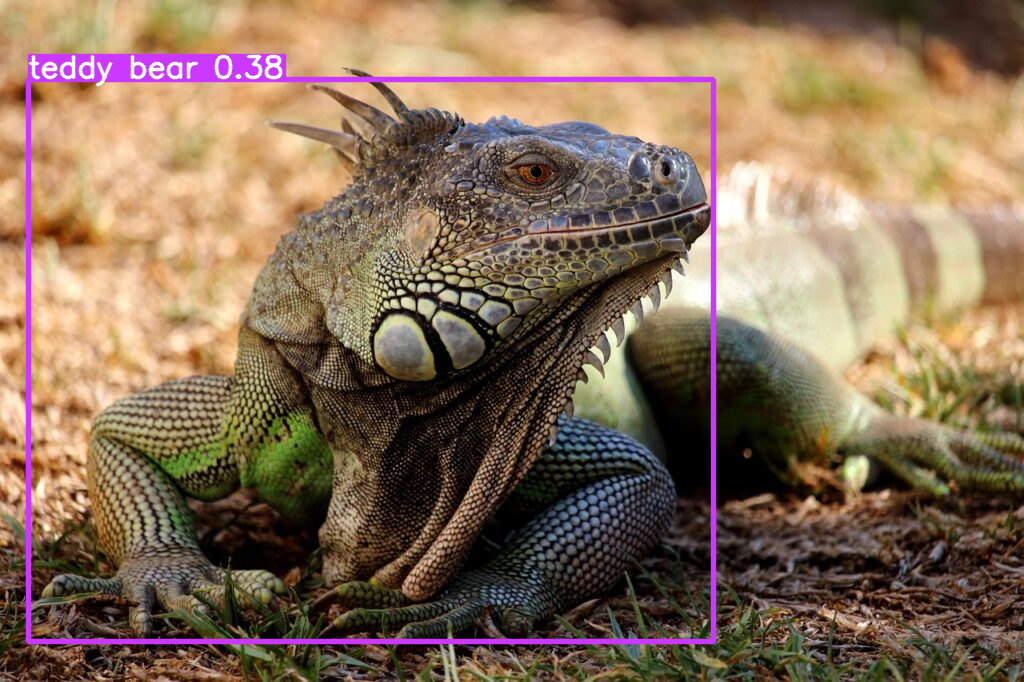

In [8]:
# Inferencia
results = model(img)

# Resultats
results.show()  # mètode de la classe detections

Una de les possibilitats de les que ens ofereixen que poden ser més pràctiques és obtenir un objecte Pandas amb els resultats de les deteccions.

En el següent [tutorial](https://docs.ultralytics.com/yolov5/tutorials/pytorch_hub_model_loading/#json-results) podeu consultar altres modes d'obtenir el resultat.

In [10]:
results.pandas().xyxy[0]

,xmin,ymin,xmax,ymax,confidence,class,name
0,503.313629,185.277817,1133.701294,1274.102539,0.816800,0,person
1,1170.039551,37.958462,2000.000000,1294.579590,0.736904,0,person
2,169.251373,339.407471,552.068359,1289.670410,0.714362,0,person
3,0.000000,344.467712,387.164856,1299.613770,0.640425,0,person


Encara que la YOLO original no estava pensada per fer aquesta tasca, existeixen modificacions de la seva arquitectura per poder realitzar-la: 
[tutorial](https://github.com/ultralytics/yolov5/blob/master/segment/tutorial.ipynb)